In [271]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
treated = ["ABINGTON",  "AMBLER",  "CHELTENHAM",  "COLLEGEVILLE",  "CONSHOHOCKEN", 
                   "EAST GREENVILLE",  "EAST NORRITON",  "FRANCONIA" , "GREEN LANE", "HATFIELD TOWNSHIP", 
                   "HORSHAM" , "JENKINTOWN",  "LANSDALE",  "LIMERICK",  "LOWER GWYNEDD", 
                   "LOWER MERION",  "LOWER MORELAND",  "LOWER POTTSGROVE",  "LOWER PROVIDENCE",  "LOWER SALFORD", 
                   "MARLBOROUGH",  "MONTGOMERY",  "NARBERTH",  "PENNSBURG",  "PERKIOMEN", 
                   "PLYMOUTH",  "POTTSTOWN",  "RED HILL",  "ROCKLEDGE",  "ROYERSFORD", 
                   "SCHWENKSVILLE",  "SKIPPACK",  "SOUDERTON",  "TELFORD",  "TOWAMENCIN", 
                   "UPPER DUBLIN",  "UPPER FREDERICK",  "UPPER GWYNEDD",  "UPPER HANOVER",  "UPPER MERION", 
                   "UPPER MORELAND",  "UPPER POTTSGROVE",  "UPPER PROVIDENCE",  "UPPER SALFORD",  "WEST CONSHOHOCKEN", 
                   "WEST NORRITON",  "WEST POTTSGROVE",  "WHITEMARSH",  "WHITPAIN",  "WORCESTER"]
control = ["BRIDGEPORT", "BRYN ATHYN", "DOUGLASS", "HATBORO", "HATFIELD BORO", 
                   "LOWER FREDERICK", "NEW HANOVER", "NORRISTOWN", "NORTH WALES", "SALFORD", 
                   "SPRINGFIELD", "TRAPPE"]         

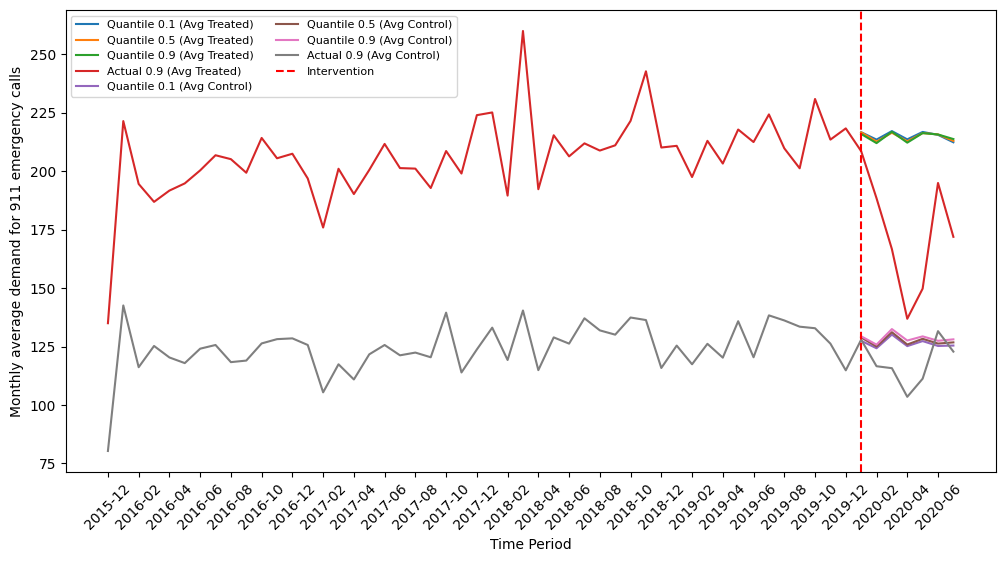

In [272]:

# Get a list of all CSV files in the folder for quantiles 0.1, 0.5, and 0.9
quantiles = ['0.1', '0.5', '0.9']
csv_files = {q: './results/nn_model_results/rnn/processed_ensemble_forecasts/callsMT215_without_stl_LSTMcell_cocob_without_stl_decomposition_'+f'{q}.txt' for q in quantiles}


dataset_name = 'calls911_benchmarks'
data_index = pd.read_csv('./datasets/text_data/calls911/'+dataset_name+'.csv')
data_index.set_index(pd.to_datetime(data_index['date'], format = '%Y-%m-%d').apply(lambda x: x.strftime("%Y-%m")), inplace=True)
data_index = data_index.iloc[:,1:]

all_columns = data_index.columns.tolist()

# Create a binary mask indicating whether each column is treated (1) or control (0)
tnc = [1 if col in treated else 0 for col in all_columns]

# Create a dictionary to store the dataframes for each quantile
dfs = {q: [] for q in quantiles}

# Iterate over each quantile
for quantile, files in csv_files.items():
    # Iterate over each file for the quantile
    # Load the text data from CSV
    data = pd.read_csv(files, header=None)

    # Transpose the data for better visualization (units as rows, time periods as columns)
    transposed_data = data.transpose()

    # Append the transposed dataframe to the list for the current quantile
    dfs[quantile].append(transposed_data)

# Concatenate the dataframes along the columns (units) for each quantile
concatenated_data = {q: pd.concat(frames, axis=1) for q, frames in dfs.items()}


# a boolean list to denote whether the unit is treated or controled
tnc_bool = [bool(value) for value in tnc]
flipped_tnc_bool = [not value for value in tnc_bool]

# average predicted treated units
averages_predicted_treated = {q: concatenated_data[q][concatenated_data[q].columns[tnc_bool]].mean(axis=1) for q in quantiles}

# average actual treated units
averages_actual_treated = data_index[data_index.columns[tnc_bool]].mean(axis=1)

# average predicted control units
averages_predicted_control = {q: concatenated_data[q][concatenated_data[q].columns[flipped_tnc_bool]].mean(axis=1) for q in quantiles}

# average actual control units
averages_actual_control = data_index[data_index.columns[flipped_tnc_bool]].mean(axis=1)


# Plot the averages
fig, ax = plt.subplots(figsize=(12, 6))

for quantile, average_data in averages_predicted_treated.items():
    ax.plot((len(averages_actual_treated)-average_data.index-1)[::-1], average_data, label=f'Quantile {quantile} (Avg Treated)')
ax.plot(averages_actual_treated.index, averages_actual_treated, label=f'Actual {quantile} (Avg Treated)')

for quantile, average_data in averages_predicted_control.items():
    ax.plot((len(averages_actual_treated)-average_data.index-1)[::-1], average_data, label=f'Quantile {quantile} (Avg Control)')
ax.plot(averages_actual_control.index, averages_actual_control, label=f'Actual {quantile} (Avg Control)')

# Add a vertical line at 2020-01
plt.axvline("2020-01", color='red', linestyle='--', label='Intervention')

ax.set_xlabel('Time Period')
ax.set_ylabel('Monthly average demand for 911 emergency calls')
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=2, fontsize=8)
plt.xticks(averages_actual_control.index[::2],rotation=45)
plt.show()

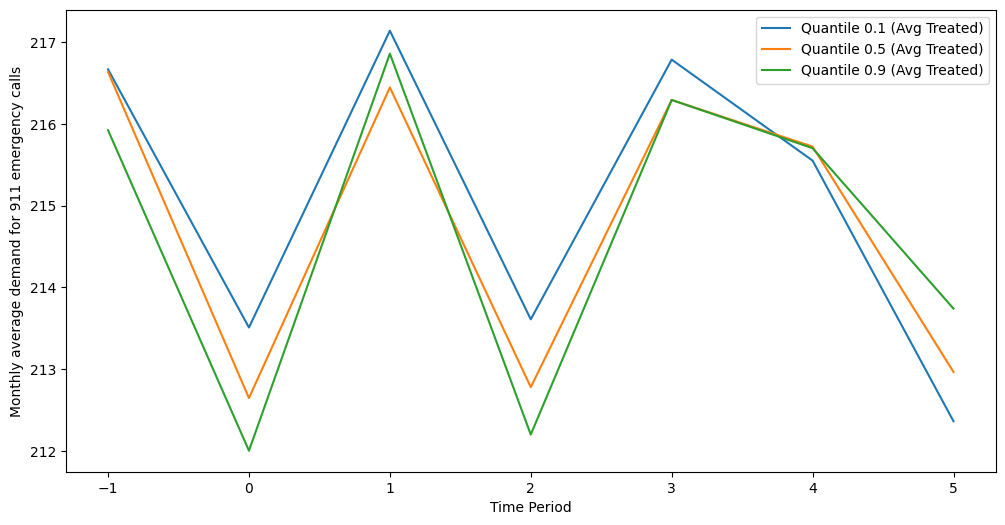

In [273]:
# Plot the averages
fig, ax = plt.subplots(figsize=(12, 6))

for quantile, average_data in averages_predicted_treated.items():
    ax.plot(average_data.index-1, average_data, label=f'Quantile {quantile} (Avg Treated)')

# for quantile, average_data in averages_predicted_control.items():
#     ax.plot((len(averages_actual_treated)-average_data.index-1)[::-1], average_data, label=f'Quantile {quantile} (Avg Control)')

ax.set_xlabel('Time Period')
ax.set_ylabel('Monthly average demand for 911 emergency calls')
ax.legend()
# ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=2, fontsize=9)
# plt.xticks(averages_actual_control.index[::2],rotation=45)
plt.show()

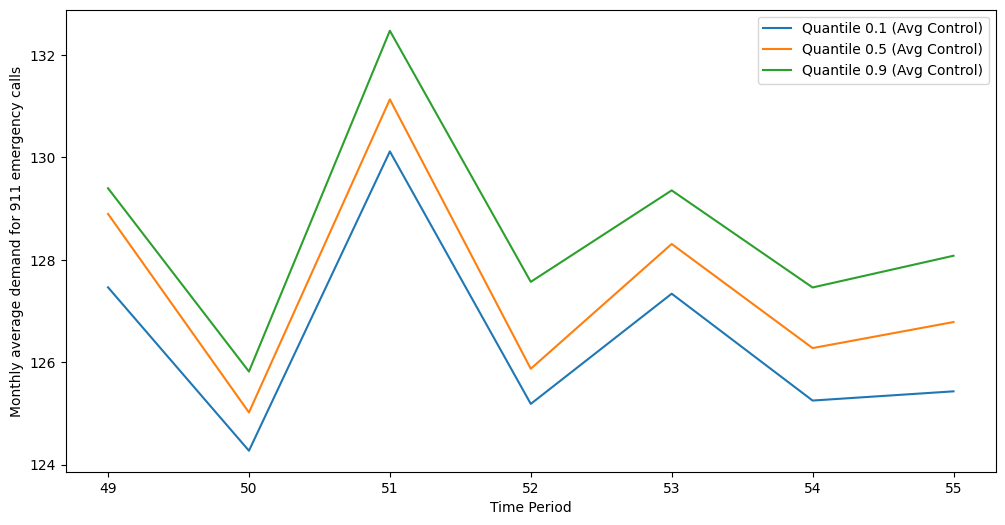

In [274]:
# Plot the averages
fig, ax = plt.subplots(figsize=(12, 6))

# for quantile, average_data in averages_predicted_treated.items():
#     ax.plot(average_data.index-1, average_data, label=f'Quantile {quantile} (Avg Treated)')

for quantile, average_data in averages_predicted_control.items():
    ax.plot((len(averages_actual_treated)-average_data.index-1)[::-1], average_data, label=f'Quantile {quantile} (Avg Control)')

ax.set_xlabel('Time Period')
ax.set_ylabel('Monthly average demand for 911 emergency calls')
ax.legend()
# ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=2, fontsize=9)
# plt.xticks(averages_actual_control.index[::2],rotation=45)
plt.show()

In [277]:
# MEAN DIFFERENCE TESTING

# 1. Preparing the data
for q in quantiles:
    # Treated group
    diff_I = pd.DataFrame(averages_predicted_treated[q], columns=['Predicted'])
    diff_I['Y'] = list(averages_actual_treated[-len(averages_predicted_treated[q]):].values)
    diff_I['ab_diff'] = abs(diff_I['Predicted'] - diff_I['Y'])
    diff_I['ab_sum_av'] = (abs(diff_I['Predicted']) + abs(diff_I['Y'])) / 2
    diff_I['ab_diff_propY'] = diff_I['ab_diff'] / diff_I['Y']
    diff_I['ab_diff_propT'] = diff_I['ab_diff'] / diff_I['Predicted']
    diff_I['ab_diff_propYF'] = diff_I['ab_diff'] / diff_I['ab_sum_av']


    # Control group
    diff_NI = pd.DataFrame(averages_predicted_control[q], columns=['Predicted'])
    diff_NI['Y'] = list(averages_actual_control[-len(averages_predicted_control[q]):].values)
    diff_NI['ab_diff'] = abs(diff_NI['Predicted'] - diff_NI['Y'])
    diff_NI['ab_sum_av'] = (abs(diff_NI['Predicted']) + abs(diff_NI['Y'])) / 2
    diff_NI['ab_diff_propY'] = diff_NI['ab_diff'] / diff_NI['Y']
    diff_NI['ab_diff_propT'] = diff_NI['ab_diff'] / diff_NI['Predicted']
    diff_NI['ab_diff_propYF'] = diff_NI['ab_diff'] / diff_NI['ab_sum_av']

    # 2. MEAN SIGNIFICANCE TESTS FOR relative differences
    diff_I_vec = diff_I['ab_diff_propT'].values * 100
    diff_NI_vec = diff_NI['ab_diff_propT'].values * 100
    print(q)
    # Display mean and median for each group
    print("Treated Group TTE - Mean:", diff_I['ab_diff'].mean())
    print("Control Group TTE - Mean:", diff_NI['ab_diff'].mean())

    print("Treated Group - Mean:", diff_I_vec.mean(), "Median:", pd.Series(diff_I_vec).median())
    print("Control Group - Mean:", diff_NI_vec.mean(), "Median:", pd.Series(diff_NI_vec).median())
    if q == "0.5":
        # Shapiro-Wilk’s test for normality
        shapiro_diff_I = shapiro(diff_I_vec)
        shapiro_diff_NI = shapiro(diff_NI_vec)

        print("Shapiro-Wilk test p-value for Treated Group:", shapiro_diff_I.pvalue)
        print("Shapiro-Wilk test p-value for Control Group:", shapiro_diff_NI.pvalue)

        # Apply t-test if data is normally distributed, otherwise Wilcoxon signed-rank test
        if shapiro_diff_I.pvalue > 0.05 and shapiro_diff_NI.pvalue > 0.05:
            t_test_result = ttest_rel(diff_I_vec, diff_NI_vec)
            print("T-Test p-value:", t_test_result.pvalue)
        else:
            wilcoxon_test_result = wilcoxon(diff_I_vec, diff_NI_vec)
            print("Wilcoxon test p-value:", wilcoxon_test_result.pvalue)

0.1
Treated Group TTE - Mean: 41.199122346763936
Control Group TTE - Mean: 9.887072997618015
Treated Group - Mean: 19.163356143522872 Median: 19.043910882475316
Control Group - Mean: 7.809409209362664 Median: 6.185931177153414
0.5
Treated Group TTE - Mean: 40.89364887665818
Control Group TTE - Mean: 10.49729916563743
Treated Group - Mean: 19.059751828216182 Median: 19.27296741017883
Control Group - Mean: 8.231710012399853 Median: 6.746844400887484
Shapiro-Wilk test p-value for Treated Group: 0.8413778265177854
Shapiro-Wilk test p-value for Control Group: 0.7148569455571174
T-Test p-value: 0.004474292534730117
0.9
Treated Group TTE - Mean: 40.7842036112423
Control Group TTE - Mean: 11.282241794770915
Treated Group - Mean: 19.012489226184663 Median: 19.56558265269262
Control Group - Mean: 8.756896522218948 Median: 7.33847806487086
The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


In [33]:
%history

import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
treated = ["ABINGTON",  "AMBLER",  "CHELTENHAM",  "COLLEGEVILLE",  "CONSHOHOCKEN", 
                   "EAST GREENVILLE",  "EAST NORRITON",  "FRANCONIA" , "GREEN LANE", "HATFIELD TOWNSHIP", 
                   "HORSHAM" , "JENKINTOWN",  "LANSDALE",  "LIMERICK",  "LOWER GWYNEDD", 
                   "LOWER MERION",  "LOWER MORELAND",  "LOWER POTTSGROVE",  "LOWER PROVIDENCE",  "LOWER SALFORD", 
                   "MARLBOROUGH",  "MONTGOMERY",  "NARBERTH",  "PENNSBURG",  "PERKIOMEN", 
                   "PLYMOUTH",  "POTTSTOWN",  "RED HILL",  "ROCKLEDGE",  "ROYERSFORD", 
                   "SCHWENKSVILLE",  "SKIPPACK",  "SOUDERTON",  "TELFORD",  "TOWAMENCIN", 
                   "UPPER DUBLIN",  "UPPER FREDERICK",  "UPPER GWYNEDD",  "UPPER HANOVER",  "UPPER MERION", 
                   "UPPER MORELAND",  "UPPER POTTSGROVE",  "UPPER PROVIDENCE",  "UPPER SALFORD",  "WEST CONSHOHOCKEN", 
                   

In [77]:
### start from here

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_rel, wilcoxon


In [124]:


# Get a list of all CSV files in the folder for quantiles 0.1, 0.5, and 0.9
quantiles = ['0.1', '0.5', '0.9']
dataset_name = 'sim_10_60_l_he'


,series_id,value,c_t,time_series_length,amount_of_time_series,dgp,te_intervention,tnc
time,,,,,,,,
1,10_1_60_linear_heterogeneous,4.000000,control,60,10,linear,heterogeneous,0
1,10_2_60_linear_heterogeneous,4.000000,control,60,10,linear,heterogeneous,0
1,10_3_60_linear_heterogeneous,4.000000,control,60,10,linear,heterogeneous,0
1,10_4_60_linear_heterogeneous,4.000000,control,60,10,linear,heterogeneous,0
1,10_5_60_linear_heterogeneous,4.000000,control,60,10,linear,heterogeneous,0
...,...,...,...,...,...,...,...,...
60,10_6_60_linear_heterogeneous,5.331190,treated,60,10,linear,heterogeneous,1
60,10_7_60_linear_heterogeneous,3.879921,treated,60,10,linear,heterogeneous,1
60,10_8_60_linear_heterogeneous,12.673118,treated,60,10,linear,heterogeneous,1


In [127]:
def plot_ts(dataset_name, quantiles):
    data_train = pd.read_csv('./datasets/text_data/sim/'+dataset_name+'_train.csv')
    data_test = pd.read_csv('./datasets/text_data/sim/'+dataset_name+'_test_actual.csv')
    data_index = pd.concat([data_train,data_test],axis=0)
    # data_index = data_index.sort_values(by=['series_id','time'], ignore_index=True)
    data_index['tnc'] = ['1' if i == 'treated' else '0' for i in data_index['c_t']]
    data_index.set_index(data_index['time'], inplace=True)
    data_full = data_index.drop(['time'], axis=1)
    
    predicted_csv_files = {q: './results/nn_model_results/rnn/processed_ensemble_forecasts/'+dataset_name+'_LSTMcell_cocob_without_stl_decomposition_'+f'{q}.txt' for q in quantiles}

    # Create a dictionary to store the dataframes for each quantile
    dfs = {q: [] for q in quantiles}

    # Iterate over each quantile
    for quantile, files in predicted_csv_files.items():
        # Iterate over each file for the quantile
        # Load the text data from CSV
        data = pd.read_csv(files, header=None)

        # Transpose the data for better visualization (units as rows, time periods as columns)
        transposed_data = data.transpose()

        # Append the transposed dataframe to the list for the current quantile
        dfs[quantile].append(transposed_data)

    # Concatenate the dataframes along the columns (units) for each quantile
    concatenated_data = {q: pd.concat(frames, axis=1) for q, frames in dfs.items()}

    # average predicted treated units
    averages_predicted_treated = {q: concatenated_data[q].iloc[\
            :,int(len(concatenated_data[q].columns)/2):].mean(axis=1)\
                for q in quantiles}
    

    # average actual treated units
    averages_actual_treated = data_full[data_full.tnc == '1']
    averages_actual_treated = averages_actual_treated.pivot(columns=\
                                'series_id')['value'].mean(axis=1)


    # average predicted control units
    averages_predicted_control = {q: concatenated_data[q].iloc[\
            :,:int(len(concatenated_data[q].columns)/2)].mean(axis=1)\
                for q in quantiles}
    

    # average actual control units
    averages_actual_control = data_full[data_full.tnc == '0']
    averages_actual_control = averages_actual_control.pivot(columns=\
                                'series_id')['value'].mean(axis=1)

    # Plot the averages
    fig, ax = plt.subplots(figsize=(12, 6))

    for quantile, average_data in averages_predicted_treated.items():
        ax.plot((len(averages_actual_treated)-average_data.index-1)[::-1],\
                 average_data, label=f'Quantile {quantile} (Avg Treated)')
    ax.plot(averages_actual_treated.index, averages_actual_treated,\
             label=f'Actual {quantile} (Avg Treated)')

    for quantile, average_data in averages_predicted_control.items():
        ax.plot((len(averages_actual_treated)-average_data.index-1)[::-1],\
                 average_data, label=f'Quantile {quantile} (Avg Control)')
    ax.plot(averages_actual_control.index, averages_actual_control,\
             label=f'Actual {quantile} (Avg Control)')

    # Add a vertical line at 2020-01
    plt.axvline(len(averages_actual_control)-12, color='red', linestyle='--', label='Intervention')

    ax.set_xlabel('Time Period')
    ax.set_ylabel(str(dataset_name))
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=2, fontsize=8)
    plt.xticks(averages_actual_control.index[::2])
    plt.show()

    # MEAN DIFFERENCE TESTING

    # 1. Preparing the data

    # Treated group
    diff_I = pd.DataFrame(averages_predicted_treated['0.5'].copy(), columns=['Predicted'])
    diff_I['Y'] = list(averages_actual_treated[-len(averages_predicted_treated["0.5"]):].values)
    diff_I
    diff_I['ab_diff'] = abs(diff_I['Predicted'] - diff_I['Y'])
    diff_I['ab_sum_av'] = (abs(diff_I['Predicted']) + abs(diff_I['Y'])) / 2
    diff_I['ab_diff_propY'] = diff_I['ab_diff'] / diff_I['Y']
    diff_I['ab_diff_propT'] = diff_I['ab_diff'] / diff_I['Predicted']
    diff_I['ab_diff_propYF'] = diff_I['ab_diff'] / diff_I['ab_sum_av']
    diff_I


    # Control group
    diff_NI = pd.DataFrame(averages_predicted_control['0.5'], columns=['Predicted'])
    diff_NI['Y'] = list(averages_actual_control[-len(averages_predicted_control["0.5"]):].values)
    diff_NI['ab_diff'] = abs(diff_NI['Predicted'] - diff_NI['Y'])
    diff_NI['ab_sum_av'] = (abs(diff_NI['Predicted']) + abs(diff_NI['Y'])) / 2
    diff_NI['ab_diff_propY'] = diff_NI['ab_diff'] / diff_NI['Y']
    diff_NI['ab_diff_propT'] = diff_NI['ab_diff'] / diff_NI['Predicted']
    diff_NI['ab_diff_propYF'] = diff_NI['ab_diff'] / diff_NI['ab_sum_av']

    # 2. MEAN SIGNIFICANCE TESTS FOR relative differences
    diff_I_vec = diff_I['ab_diff_propT'].values * 100
    diff_NI_vec = diff_NI['ab_diff_propT'].values * 100

    # Display mean and median for each group
    print("Treated Group - Mean:", diff_I_vec.mean(), "Median:", pd.Series(diff_I_vec).median())
    print("Control Group - Mean:", diff_NI_vec.mean(), "Median:", pd.Series(diff_NI_vec).median())

    # Shapiro-Wilk’s test for normality
    shapiro_diff_I = shapiro(diff_I_vec)
    shapiro_diff_NI = shapiro(diff_NI_vec)

    print("Shapiro-Wilk test p-value for Treated Group:", shapiro_diff_I.pvalue)
    print("Shapiro-Wilk test p-value for Control Group:", shapiro_diff_NI.pvalue)

    # Apply t-test if data is normally distributed, otherwise Wilcoxon signed-rank test
    if shapiro_diff_I.pvalue > 0.05 and shapiro_diff_NI.pvalue > 0.05:
        t_test_result = ttest_rel(diff_I_vec, diff_NI_vec)
        print("T-Test p-value:", t_test_result.pvalue)
    else:
        wilcoxon_test_result = wilcoxon(diff_I_vec, diff_NI_vec)
        print("Wilcoxon test p-value:", wilcoxon_test_result.pvalue)

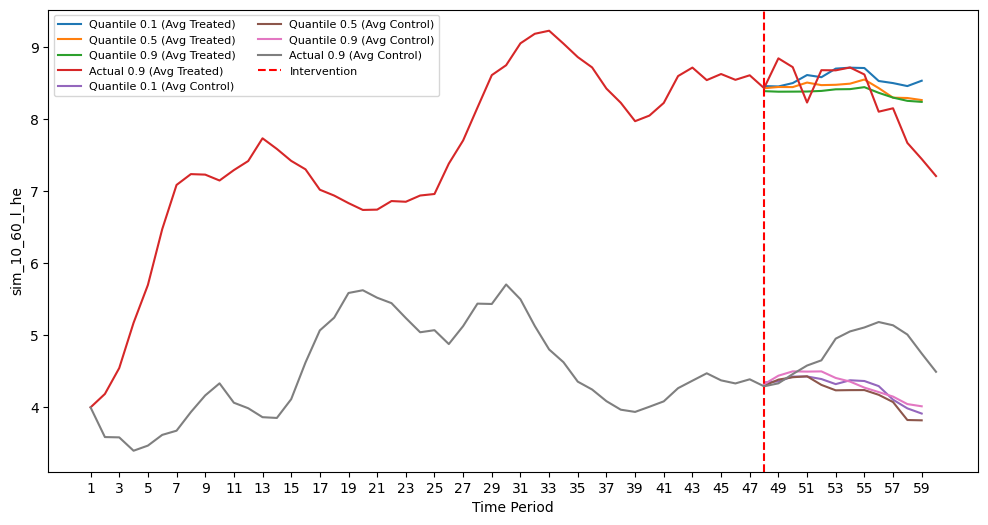

Treated Group - Mean: 4.879202204917561 Median: 3.2903339058118153
Control Group - Mean: 14.657489030876183 Median: 18.450315770627753
Shapiro-Wilk test p-value for Treated Group: 0.02139123913156757
Shapiro-Wilk test p-value for Control Group: 0.021057516368325497
Wilcoxon test p-value: 0.0068359375


In [128]:
dataset_name = 'sim_10_60_l_he'

plot_ts(dataset_name, quantiles)

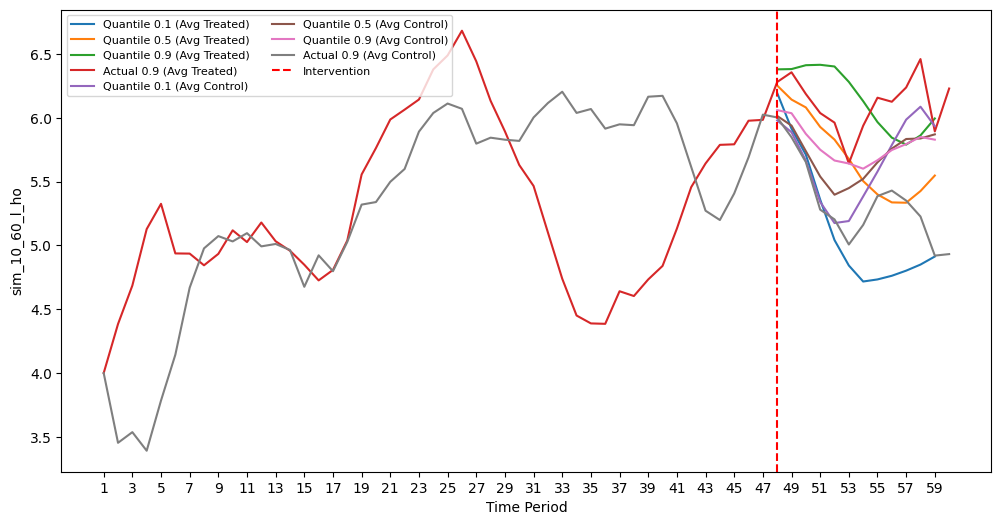

Treated Group - Mean: 7.971693639500123 Median: 6.600941320167197
Control Group - Mean: 7.4773654647528005 Median: 6.568325810515443
Shapiro-Wilk test p-value for Treated Group: 0.14494690238884006
Shapiro-Wilk test p-value for Control Group: 0.06838119727706408
T-Test p-value: 0.8162049846210824


In [129]:
dataset_name = 'sim_10_60_l_ho'

plot_ts(dataset_name, quantiles)

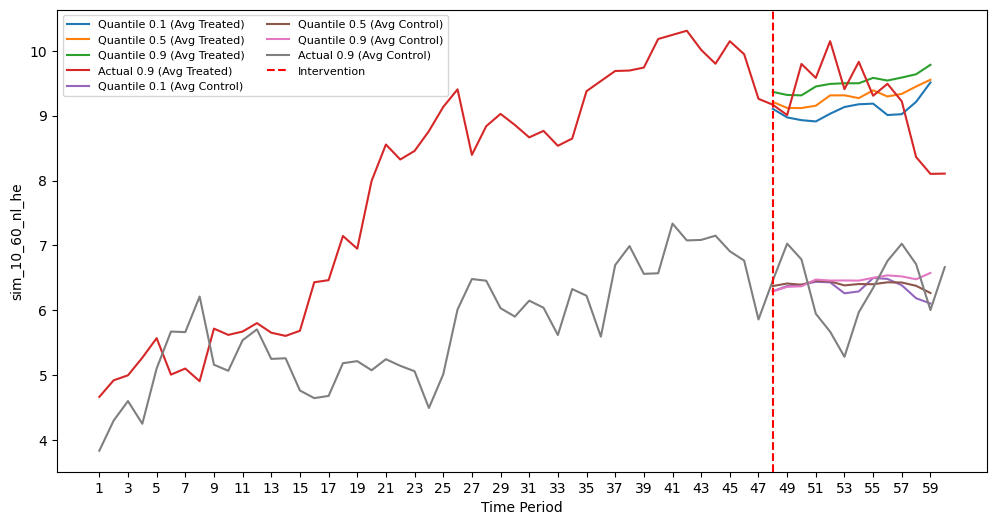

Treated Group - Mean: 6.1897479542164 Median: 5.317924568168111
Control Group - Mean: 7.677099405599807 Median: 6.421441440660162
Shapiro-Wilk test p-value for Treated Group: 0.1088288796628395
Shapiro-Wilk test p-value for Control Group: 0.17434209767526498
T-Test p-value: 0.5043372280247245


In [130]:
dataset_name = 'sim_10_60_nl_he'

plot_ts(dataset_name, quantiles)

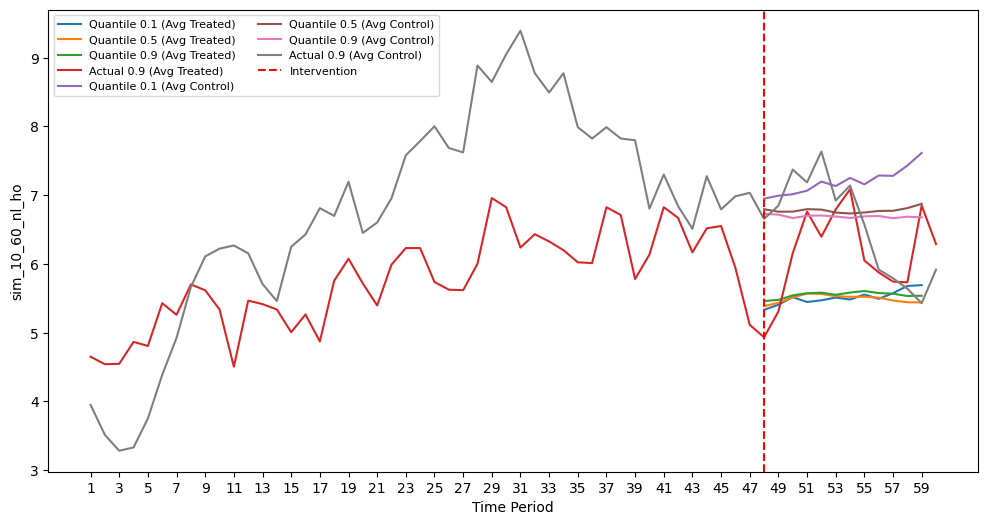

Treated Group - Mean: 14.074957711446004 Median: 14.058780057267892
Control Group - Mean: 9.693767721665436 Median: 10.676531390502982
Shapiro-Wilk test p-value for Treated Group: 0.5060049302693044
Shapiro-Wilk test p-value for Control Group: 0.6715889638044394
T-Test p-value: 0.19461318511386053


In [131]:
dataset_name = 'sim_10_60_nl_ho'

plot_ts(dataset_name, quantiles)

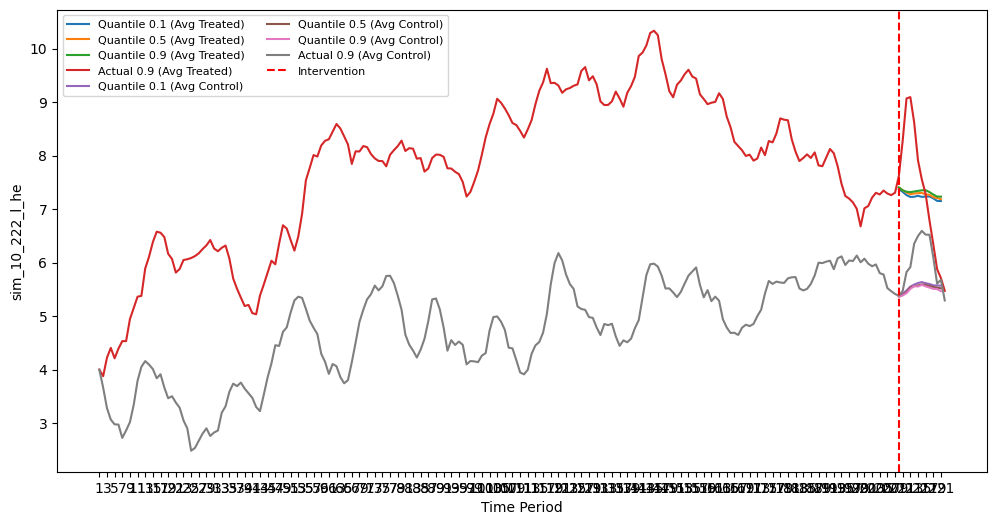

Treated Group - Mean: 14.404417921230584 Median: 15.595606108957954
Control Group - Mean: 9.947095727297128 Median: 9.08524764299867
Shapiro-Wilk test p-value for Treated Group: 0.3314639590779231
Shapiro-Wilk test p-value for Control Group: 0.0987245399185647
T-Test p-value: 0.2824809830430522


In [132]:
dataset_name = 'sim_10_222_l_he'

plot_ts(dataset_name, quantiles)

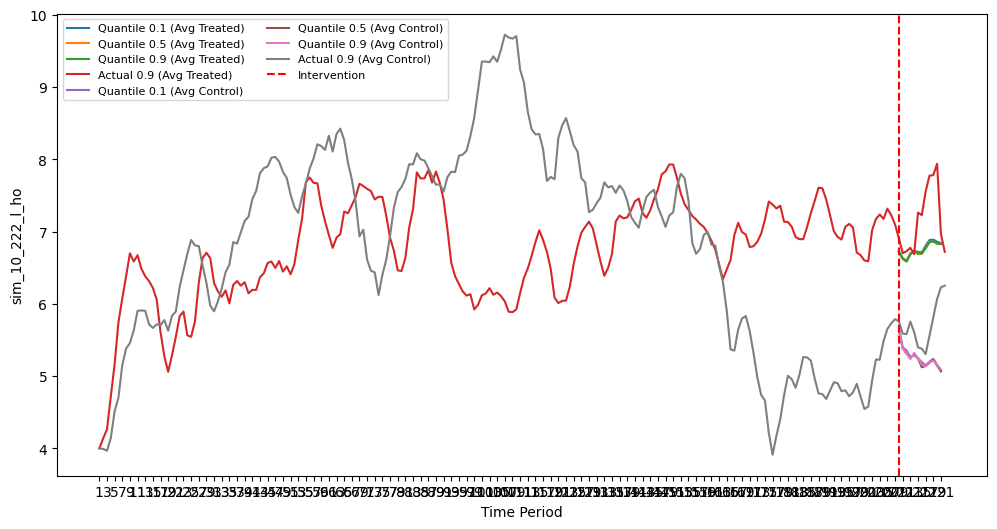

Treated Group - Mean: 6.728066878272814 Median: 5.369756690091264
Control Group - Mean: 9.014274599389418 Median: 7.466057585638733
Shapiro-Wilk test p-value for Treated Group: 0.04252548051753851
Shapiro-Wilk test p-value for Control Group: 0.12294142815939724
Wilcoxon test p-value: 0.67724609375


In [133]:
dataset_name = 'sim_10_222_l_ho'

plot_ts(dataset_name, quantiles)

In [ ]:
dataset_name = 'sim_10_222_l_ho'

plot_ts(dataset_name, quantiles)

In [280]:
def plot_ts2(dataset_name, quantiles, plot=False):
    data_train = pd.read_csv('./datasets/text_data/sim/'+dataset_name+'_train.csv')
    data_test = pd.read_csv('./datasets/text_data/sim/'+dataset_name+'_test_actual.csv')
    data_index = pd.concat([data_train,data_test],axis=0)
    # data_index = data_index.sort_values(by=['series_id','time'], ignore_index=True)
    data_index['tnc'] = ['1' if i == 'treated' else '0' for i in data_index['c_t']]
    data_index.set_index(data_index['time'], inplace=True)
    data_full = data_index.drop(['time'], axis=1)
    
    predicted_csv_files = {q: './results/nn_model_results/rnn/processed_ensemble_forecasts/'+dataset_name+'_LSTMcell_cocob_without_stl_decomposition_'+f'{q}.txt' for q in quantiles}
    
    # Create a dictionary to store the dataframes for each quantile
    dfs = {q: [] for q in quantiles}

    # Iterate over each quantile
    for quantile, files in predicted_csv_files.items():
        # Iterate over each file for the quantile
        # Load the text data from CSV
        data = pd.read_csv(files, header=None)

        # Transpose the data for better visualization (units as rows, time periods as columns)
        transposed_data = data.transpose()

        # Append the transposed dataframe to the list for the current quantile
        dfs[quantile].append(transposed_data)

    # Concatenate the dataframes along the columns (units) for each quantile
    concatenated_data = {q: pd.concat(frames, axis=1) for q, frames in dfs.items()}
    diff_I_vec_all, diff_NI_vec_all = 0, 0
    for i in range(int(len(transposed_data.columns)/2)):
        # predicted treated units
        predicted_treated = {q: concatenated_data[q].iloc[:,\
                         int(i+len(transposed_data.columns)/2)]\
                              for q in quantiles}

        # actual treated units
        actual_treated = data_full[['_'+str(int(1+i+len(transposed_data.columns)/2))+\
                                    '_' in j for j in data_full.series_id]]
        actual_treated = actual_treated.pivot(columns=\
                                    'series_id')['value']

        # predicted control units
        predicted_control = {q: concatenated_data[q].iloc[\
                :,i] for q in quantiles}

        # actual control units
        actual_control = data_full[['_'+str(1+i)+\
                                    '_' in j for j in data_full.series_id]]
        actual_control = actual_control.pivot(columns=\
                                    'series_id')['value']
        if plot:
            # Plot the averages
            fig, ax = plt.subplots(figsize=(12, 6))

            for quantile, data in predicted_treated.items():
                ax.plot((len(actual_treated)-data.index-1)[::-1],\
                        data, label=f'Quantile {quantile} (Avg Treated Unit {i})')
            ax.plot(actual_treated.index, actual_treated,\
                    label=f'Actual (Avg Treated Unit {i})')

            for quantile, data in predicted_control.items():
                ax.plot((len(actual_treated)-data.index-1)[::-1],\
                        data, label=f'Quantile {quantile} (Avg Control Unit {i})')
            ax.plot(actual_control.index, actual_control,\
                    label=f'Actual (Avg Control Unit {i})')

            
            # Add a vertical line at 2020-01
            plt.axvline(len(actual_control)-12, color='red', linestyle='--', label='Intervention')

            ax.set_xlabel('Time Period')
            ax.set_ylabel(str(dataset_name))
            ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=2, fontsize=8)
            plt.xticks(actual_control.index[::2])
            plt.show()

        # MEAN DIFFERENCE TESTING

        # 1. Preparing the data

        # Treated group
        diff_I = pd.DataFrame({'Predicted':predicted_treated['0.5']})
        diff_I['Y'] = actual_treated.iloc[-len(predicted_treated["0.5"]):,0].values
        diff_I['ab_diff'] = abs(diff_I['Predicted'] - diff_I['Y'])
        diff_I['ab_sum_av'] = (abs(diff_I['Predicted']) + abs(diff_I['Y'])) / 2
        diff_I['ab_diff_propY'] = diff_I['ab_diff'] / diff_I['Y']
        diff_I['ab_diff_propT'] = diff_I['ab_diff'] / diff_I['Predicted']
        diff_I['ab_diff_propYF'] = diff_I['ab_diff'] / diff_I['ab_sum_av']

        # Control group
        diff_NI = pd.DataFrame({'Predicted':predicted_control['0.5']})
        diff_NI['Y'] = actual_control.iloc[-len(predicted_control["0.5"]):,0].values
        diff_NI['ab_diff'] = abs(diff_NI['Predicted'] - diff_NI['Y'])
        diff_NI['ab_sum_av'] = (abs(diff_NI['Predicted']) + abs(diff_NI['Y'])) / 2
        diff_NI['ab_diff_propY'] = diff_NI['ab_diff'] / diff_NI['Y']
        diff_NI['ab_diff_propT'] = diff_NI['ab_diff'] / diff_NI['Predicted']
        diff_NI['ab_diff_propYF'] = diff_NI['ab_diff'] / diff_NI['ab_sum_av']

        # 2. MEAN SIGNIFICANCE TESTS FOR relative differences
        diff_I_vec_i = diff_I['ab_diff_propT'].values * 100
        diff_NI_vec_i = diff_NI['ab_diff_propT'].values * 100

        # print(i, int(i+len(transposed_data.columns)/2))
        # # Display mean and median for each group
        # print("Treated Group - Mean:", diff_I_vec_i.mean(), "Median:", pd.Series(diff_I_vec_i).median())
        # print("Control Group - Mean:", diff_NI_vec_i.mean(), "Median:", pd.Series(diff_NI_vec_i).median())

        diff_I_vec_all += diff_I_vec_i
        diff_NI_vec_all += diff_NI_vec_i

    diff_I_vec = diff_I_vec_all/int(len(transposed_data.columns)/2)
    diff_NI_vec = diff_NI_vec_all/int(len(transposed_data.columns)/2)
    # Display mean and median for each group
    print("Treated Group - Mean:", diff_I_vec.mean(), "Median:", pd.Series(diff_I_vec).median())
    print("Control Group - Mean:", diff_NI_vec.mean(), "Median:", pd.Series(diff_NI_vec).median())

    # Shapiro-Wilk’s test for normality
    shapiro_diff_I = shapiro(diff_I_vec)
    shapiro_diff_NI = shapiro(diff_NI_vec)

    print("Shapiro-Wilk test p-value for Treated Group:", shapiro_diff_I.pvalue)
    print("Shapiro-Wilk test p-value for Control Group:", shapiro_diff_NI.pvalue)

    # Apply t-test if data is normally distributed, otherwise Wilcoxon signed-rank test
    if shapiro_diff_I.pvalue > 0.05 and shapiro_diff_NI.pvalue > 0.05:
        t_test_result = ttest_rel(diff_I_vec, diff_NI_vec)
        print("T-Test p-value:", t_test_result.pvalue)
    else:
        wilcoxon_test_result = wilcoxon(diff_I_vec, diff_NI_vec)
        print("Wilcoxon test p-value:", wilcoxon_test_result.pvalue)

In [290]:
dataset_name_test = ['sim_10_60_l_he', 'sim_10_60_l_ho',\
                     'sim_10_60_nl_he', 'sim_10_60_nl_ho',\
                     'sim_10_222_l_he', 'sim_10_222_l_ho',\
                     'sim_10_222_nl_he', 'sim_10_222_nl_ho',\
                     'sim_101_60_l_he', 'sim_101_60_l_ho',\
                     'sim_101_60_nl_he', 'sim_101_60_nl_ho',\
                     'sim_101_222_l_he', 'sim_101_222_l_ho',\
                     'sim_101_222_nl_he', 'sim_101_222_nl_ho',\
                     'sim_500_60_l_he', 'sim_500_60_l_ho',\
                     'sim_500_60_nl_he', 'sim_500_60_nl_ho',\
                     'sim_500_222_l_he', 'sim_500_222_l_ho',\
                     'sim_500_222_nl_he', 'sim_500_222_nl_ho']
for i in dataset_name_test:
    print(i)
    plot_ts2(i, quantiles)
    print(" ")

sim_10_60_l_he
Treated Group - Mean: 15.618215236269316 Median: 15.899502866452757
Control Group - Mean: 29.12917456648903 Median: 25.585543726295175
Shapiro-Wilk test p-value for Treated Group: 0.14155853378382338
Shapiro-Wilk test p-value for Control Group: 0.007962737339305746
Wilcoxon test p-value: 0.0068359375
 
sim_10_60_l_ho
Treated Group - Mean: 20.323539195375744 Median: 20.861970753176642
Control Group - Mean: 15.646872157562195 Median: 15.627142579049405
Shapiro-Wilk test p-value for Treated Group: 0.22107268087287274
Shapiro-Wilk test p-value for Control Group: 0.9199643391541742
T-Test p-value: 0.005536300102258698
 
sim_10_60_nl_he
Treated Group - Mean: 30.24539490028562 Median: 34.74146921048741
Control Group - Mean: 35.48195444074369 Median: 36.53364103284851
Shapiro-Wilk test p-value for Treated Group: 0.07377012825313885
Shapiro-Wilk test p-value for Control Group: 0.3041553763695413
T-Test p-value: 0.06122230336017505
 
sim_10_60_nl_ho
Treated Group - Mean: 38.150497

In [282]:
dataset_name = ''

plot_ts2(dataset_name, quantiles)

Treated Group - Mean: 20.323539195375744 Median: 20.861970753176642
Control Group - Mean: 15.646872157562195 Median: 15.627142579049405
Shapiro-Wilk test p-value for Treated Group: 0.22107268087287274
Shapiro-Wilk test p-value for Control Group: 0.9199643391541742
T-Test p-value: 0.005536300102258698


In [284]:
dataset_name = ''

plot_ts2(dataset_name, quantiles)

Treated Group - Mean: 30.24539490028562 Median: 34.74146921048741
Control Group - Mean: 35.48195444074369 Median: 36.53364103284851
Shapiro-Wilk test p-value for Treated Group: 0.07377012825313885
Shapiro-Wilk test p-value for Control Group: 0.3041553763695413
T-Test p-value: 0.06122230336017505


In [285]:
dataset_name = ''

plot_ts2(dataset_name, quantiles)

Treated Group - Mean: 38.150497276036994 Median: 40.10201255057345
Control Group - Mean: 37.096155381747955 Median: 38.60516960851412
Shapiro-Wilk test p-value for Treated Group: 0.11587994082224157
Shapiro-Wilk test p-value for Control Group: 0.5199990123338567
T-Test p-value: 0.8011664820798412


In [286]:
dataset_name = ''

plot_ts2(dataset_name, quantiles)

Treated Group - Mean: 20.815194799366747 Median: 21.40583616084313
Control Group - Mean: 21.71242806026271 Median: 21.04102333413226
Shapiro-Wilk test p-value for Treated Group: 0.5906986399592229
Shapiro-Wilk test p-value for Control Group: 0.9997779914706143
T-Test p-value: 0.7379919963783228


In [287]:
dataset_name = ''

plot_ts2(dataset_name, quantiles)

Treated Group - Mean: 21.993227808329888 Median: 21.81527513204629
Control Group - Mean: 70.15176436364546 Median: 66.64181729191866
Shapiro-Wilk test p-value for Treated Group: 0.6479539553505806
Shapiro-Wilk test p-value for Control Group: 0.06574801474918941
T-Test p-value: 0.0018825822836798108


In [190]:
for quantile, files in predicted_csv_files.items():
    # Iterate over each file for the quantile
    # Load the text data from CSV
    data = pd.read_csv(files, header=None)

    # Transpose the data for better visualization (units as rows, time periods as columns)
    transposed_data = data.transpose()

    # Append the transposed dataframe to the list for the current quantile
    dfs[quantile].append(transposed_data)

# Concatenate the dataframes along the columns (units) for each quantile
concatenated_data = {q: pd.concat(frames, axis=1) for q, frames in dfs.items()}

# # average predicted treated units
# averages_predicted_treated = {q: concatenated_data[q].iloc[\
#         :,int(len(concatenated_data[q].columns)/2):].mean(axis=1)\
#             for q in quantiles}

In [192]:
transposed_data

,0,1,2,3,4,5,6,7,8,9
0,6.991125,6.301158,1.595579,4.514176,2.202325,10.145553,2.893547,12.484855,10.268354,6.131543
1,7.375317,6.254870,1.572927,5.039123,1.954142,9.927241,2.912477,12.661434,10.317207,6.068119
2,7.393527,6.176349,1.663244,5.125019,2.138897,9.569663,3.100625,12.745415,10.405247,6.069724
3,7.445085,6.170067,1.693623,5.148317,2.022850,9.543782,3.166734,12.699887,10.411573,6.076473
4,7.664696,6.187992,1.740414,5.297991,1.603850,9.578660,3.270230,12.557126,10.404446,6.129312
5,7.391281,6.169939,1.860753,4.889910,1.727492,9.499311,3.498094,12.416968,10.431839,6.205075
6,7.419874,6.200983,1.950261,4.669951,1.547841,9.502851,3.709254,12.109759,10.419241,6.323229
7,7.198283,6.163843,2.115844,4.126119,1.765592,9.431769,4.047940,11.730433,10.492127,6.499066
8,6.974879,6.237054,2.111642,3.937458,1.799502,9.581570,3.906496,11.514966,10.271623,6.534376
9,6.677223,6.250865,2.138978,3.792397,1.888351,9.691827,3.758876,11.395530,10.090722,6.540368


In [193]:
'_'+str(int(1+i+len(transposed_data.columns)/2))+'_'

'_6_'

In [185]:
data

,0,1,2,3,4,5,6
0,749.475704,737.535298,764.122440,744.457077,757.296805,745.614027,753.450149
1,89.830816,91.081558,90.196615,90.344832,91.594619,93.727380,91.320186
2,69.725046,68.559856,73.372229,67.084703,72.235212,68.509814,69.460234
3,19.081296,20.417678,19.283856,20.288594,19.004172,19.247797,18.572866
4,596.114991,590.852926,609.884294,597.265229,594.718439,599.238530,592.664973
...,...,...,...,...,...,...,...
57,220.480456,210.161015,224.722394,216.109689,223.845882,218.216368,214.091775
58,54.456753,52.058861,55.152684,51.724736,52.761087,54.720700,53.670357
59,364.904556,353.128350,358.760936,361.222271,363.943835,372.317152,352.748806
60,260.758865,254.443023,261.349114,254.430366,265.506477,261.775601,260.008779


In [195]:
['_'+str(int(1+i+len(transposed_data.columns)/2))+'_' in j for j in data_index.series_id]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [198]:
data_index[['_'+str(int(1+i+len(transposed_data.columns)/2))+'_' in j for j in data_index.series_id]]


,series_id,value,c_t,time_series_length,amount_of_time_series,dgp,te_intervention,tnc
time,,,,,,,,
1,10_6_60_linear_heterogeneous,4.000000,treated,60,10,linear,heterogeneous,1
2,10_6_60_linear_heterogeneous,3.274956,treated,60,10,linear,heterogeneous,1
3,10_6_60_linear_heterogeneous,2.927431,treated,60,10,linear,heterogeneous,1
4,10_6_60_linear_heterogeneous,3.431322,treated,60,10,linear,heterogeneous,1
5,10_6_60_linear_heterogeneous,4.344974,treated,60,10,linear,heterogeneous,1
6,10_6_60_linear_heterogeneous,4.314408,treated,60,10,linear,heterogeneous,1
7,10_6_60_linear_heterogeneous,4.935989,treated,60,10,linear,heterogeneous,1
8,10_6_60_linear_heterogeneous,5.225889,treated,60,10,linear,heterogeneous,1
9,10_6_60_linear_heterogeneous,5.136426,treated,60,10,linear,heterogeneous,1


In [170]:
predicted_treated = {q: concatenated_data[q].iloc[:,\
                         i+int(len(transposed_data.columns)/2)]\
                              for q in quantiles}
predicted_treated


{'0.1': 0    38.322643
 1    35.662481
 2    39.862146
 3    36.022479
 4    40.885728
 5    35.140271
 6    37.075441
 Name: 31, dtype: float64,
 '0.5': 0    38.324875
 1    35.008483
 2    38.287383
 3    35.588827
 4    40.924504
 5    34.946373
 6    36.610415
 Name: 31, dtype: float64,
 '0.9': 0    37.262190
 1    34.855126
 2    38.201173
 3    35.746027
 4    40.145178
 5    35.050868
 6    35.776349
 Name: 31, dtype: float64}

In [161]:
{q: concatenated_data[q].iloc[:, i+int(len(transposed_data.columns)/2)] for q in quantiles}


{'0.1': 0    38.322643
 1    35.662481
 2    39.862146
 3    36.022479
 4    40.885728
 5    35.140271
 6    37.075441
 Name: 31, dtype: float64,
 '0.5': 0    38.324875
 1    35.008483
 2    38.287383
 3    35.588827
 4    40.924504
 5    34.946373
 6    36.610415
 Name: 31, dtype: float64,
 '0.9': 0    37.262190
 1    34.855126
 2    38.201173
 3    35.746027
 4    40.145178
 5    35.050868
 6    35.776349
 Name: 31, dtype: float64}

In [151]:
{q: concatenated_data[q].iloc[\
            :,:int(len(concatenated_data[q].columns)/2)].mean(axis=1)\
                for q in quantiles}

{'0.1': 0    227.065415
 1    223.228078
 2    228.546682
 3    224.285867
 4    226.856080
 5    225.576496
 6    222.606710
 dtype: float64,
 '0.5': 0    227.724645
 1    222.898295
 2    228.617927
 3    224.062429
 4    226.992512
 5    226.346564
 6    223.782983
 dtype: float64,
 '0.9': 0    227.493749
 1    222.761924
 2    229.614520
 3    224.327265
 4    227.636264
 5    226.877305
 6    225.132150
 dtype: float64}

In [156]:
type(concatenated_data[q].iloc[\
            :,:int(len(concatenated_data[q].columns)/2)].mean(axis=1))

pandas.core.series.Series